In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 25

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
data = pd.read_csv('advanced_features.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,...,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance,weighted_intersection,weighted_union,jaccard_similarity_weighted
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,...,0.833333,6,0.923077,92,98,92,100,0.000011,0.025243,35.639119,39.982959,0.891358
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,...,0.363636,4,0.533333,64,91,62,89,0.000074,0.233014,44.813524,90.737799,0.493879
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,...,0.375000,1,0.181818,66,67,71,85,0.000053,0.530295,19.995960,57.294716,0.349002
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,...,0.000000,0,0.000000,44,56,15,19,0.000117,1.000000,0.000000,80.610728,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,...,0.153846,1,0.133333,52,64,42,53,0.000117,0.764240,14.865222,110.922613,0.134014


In [6]:
data.shape

(404124, 33)

In [7]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio',
         'abs_word_diff', 'avg_num_word', 'rel_word_diff',
         'word_intersection', 'word_union', 'jaccard_similarity_word',
         'lcs_word', 'lcs_word_ratio',
         'fuzz_simple_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio',
         'hamming_distance', 'cosine_distance',
         'weighted_intersection', 'weighted_union', 'jaccard_similarity_weighted',
]
target = 'is_duplicate'

In [8]:
print(len(data[data[target] == 0])/len(data[data[target] == 1]))

1.7075533639737903


In [9]:
data = pd.concat([data[data[target] ==1], data[data[target] ==1].sample(frac=0.71), data[data[target] ==0]]).sample(frac=1.00)

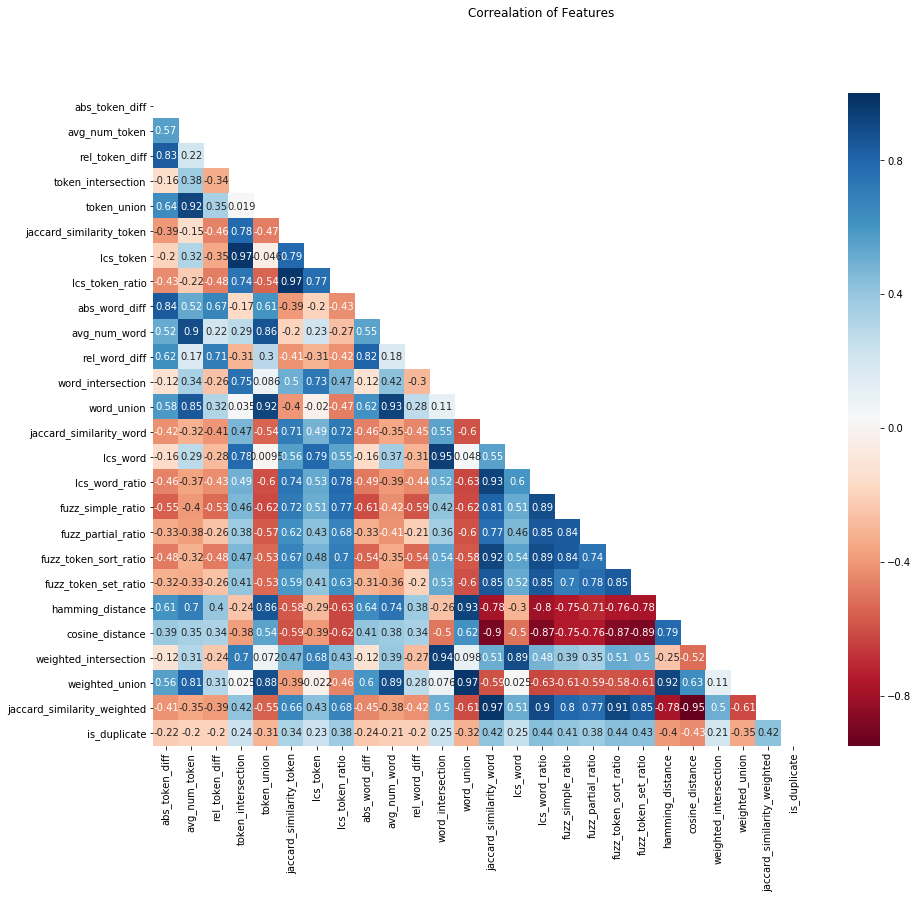

In [10]:
fig, ax = plt.subplots(figsize=(15,12))
fig.suptitle('Correalation of Features')

d = data[feats+[target]].corr()
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True

sns.heatmap(d, mask=mask, square=True, annot=True, cmap='RdBu')

In [11]:
import pickle

In [12]:
from sklearn. linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier

Mean Loss 0.5329419119372663 +- 0.0018301946395146188


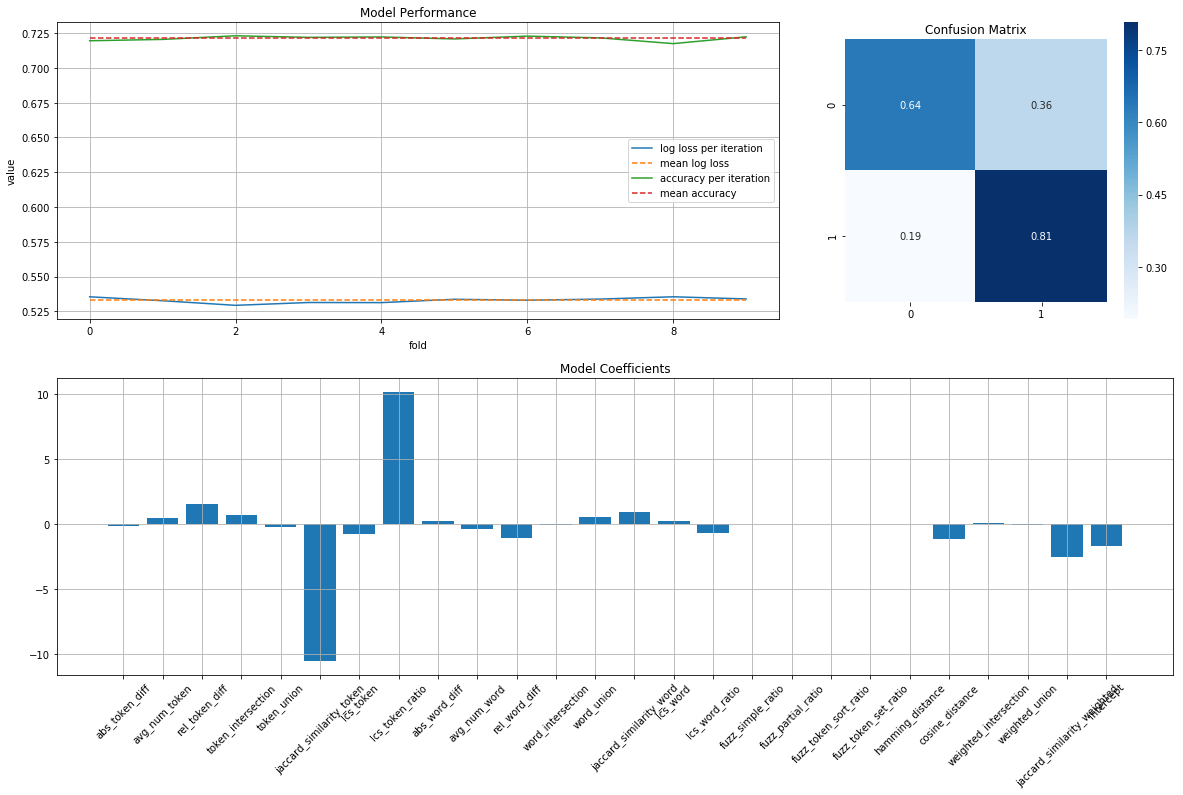

In [12]:
model = LogisticRegression(C=10)
lr10_performance, lr10_cm, lr10_model = train_model_lr(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(lr10_performance['log loss']), '+-', np.std(lr10_performance['log loss']))

Mean Loss 0.4542719224295917 +- 0.0022883630982735155


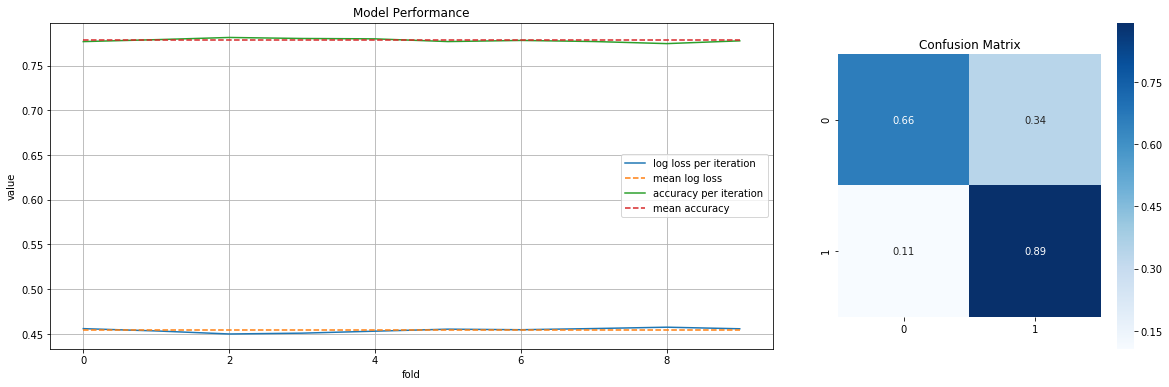

In [13]:
model = XGBClassifier(max_depth=5)
xgb_performance, xgb_cm, xgb_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(xgb_performance['log loss']), '+-', np.std(xgb_performance['log loss']))

Mean Loss 0.44957832956478566 +- 0.002787611068012833


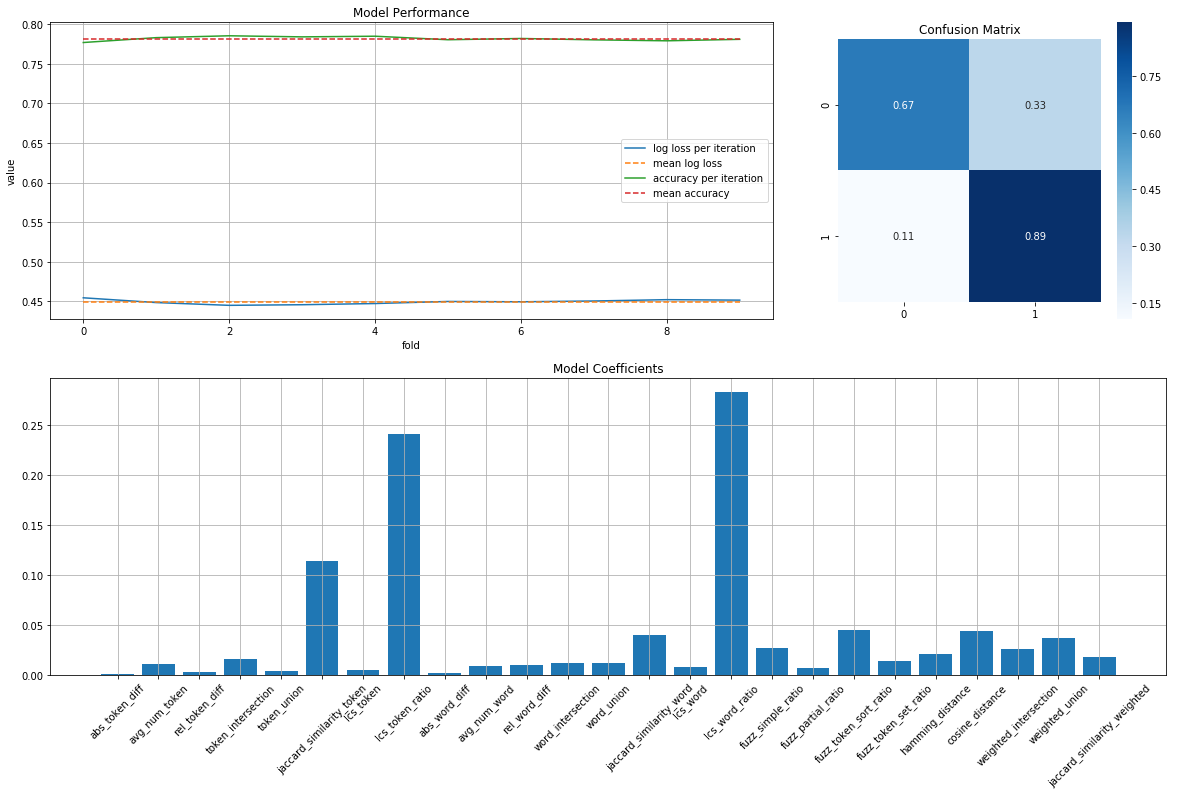

In [14]:
model = GradientBoostingClassifier(max_depth=5, random_state=101, warm_start=True)
gb_performance, gb_cm, gb_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(gb_performance['log loss']), '+-', np.std(gb_performance['log loss']))

Mean Loss 0.5481263684766735 +- 0.0012718481940449625


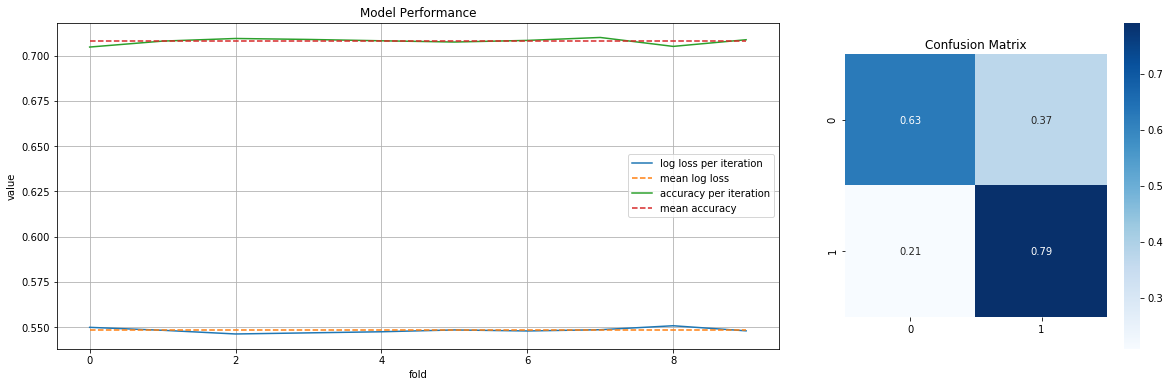

In [15]:
model = BaggingClassifier(base_estimator=LogisticRegression(C=10), bootstrap_features=True, 
                          warm_start=True, random_state=101)
bc_performance, bc_cm, bc_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(bc_performance['log loss']), '+-', np.std(bc_performance['log loss']))

Mean Loss 0.5862465182235952 +- 0.015243438934969423


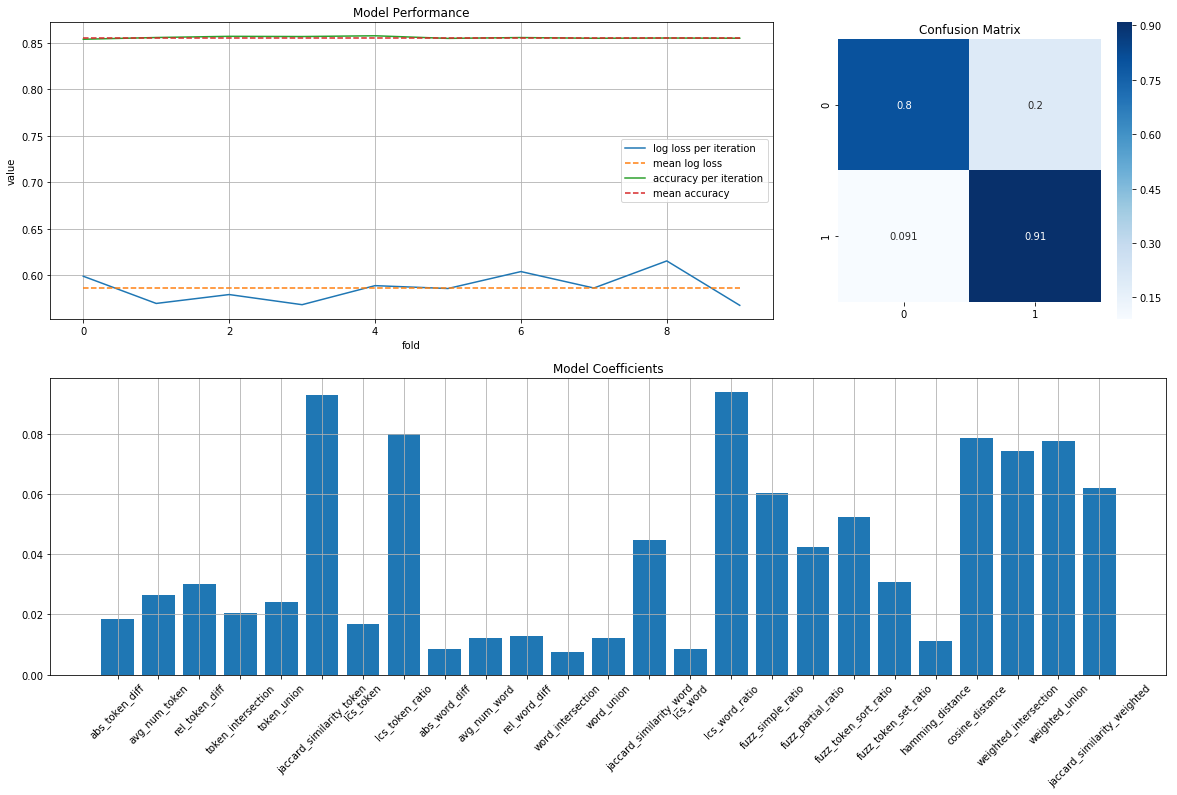

In [16]:
model = RandomForestClassifier(random_state=101)
rf_performance, rf_cm, rf_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf_performance['log loss']), '+-', np.std(rf_performance['log loss']))

Mean Loss 0.40871016342553307 +- 0.009514644889507198


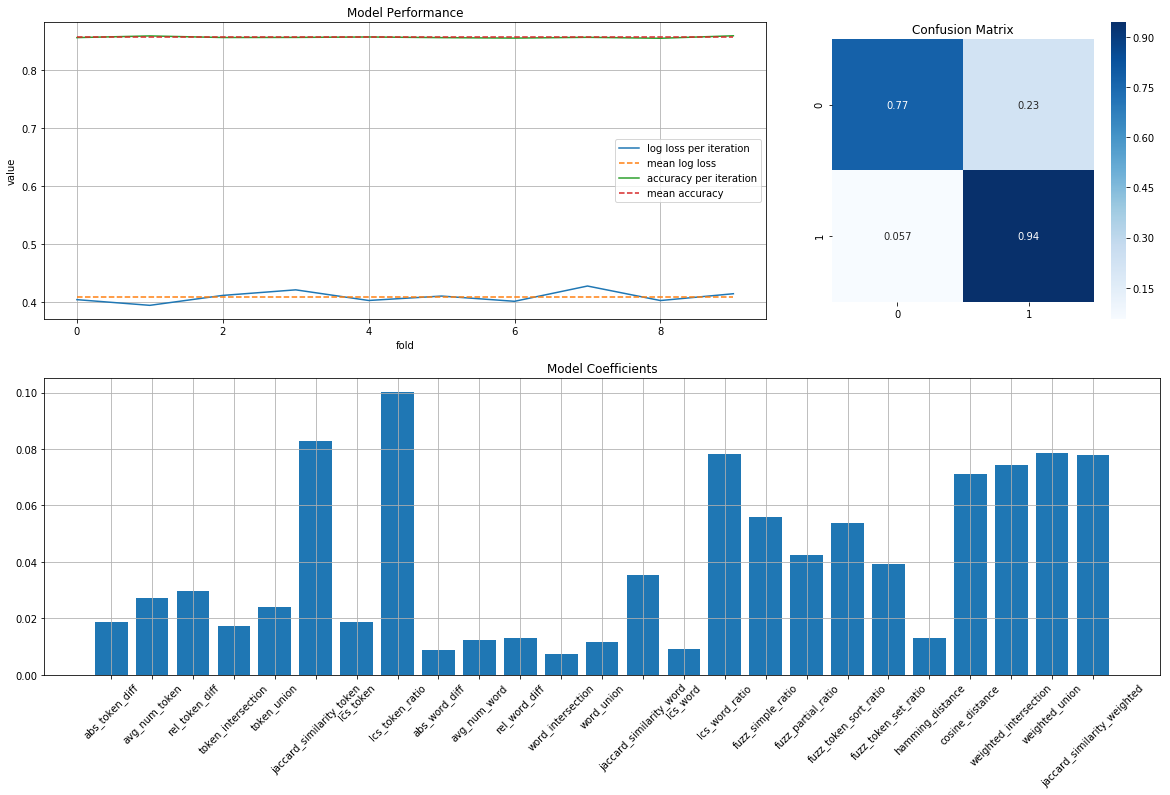

In [13]:
model = RandomForestClassifier(n_estimators=25, random_state=101)
rf25_performance, rf25_cm, rf25_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf25_performance['log loss']), '+-', np.std(rf25_performance['log loss']))

In [14]:
pickle.dump(rf25_model, open('ClassBalancedRF25.pkl', 'wb'))
del rf25_model

Mean Loss 0.3718833128199982 +- 0.006549898631522214


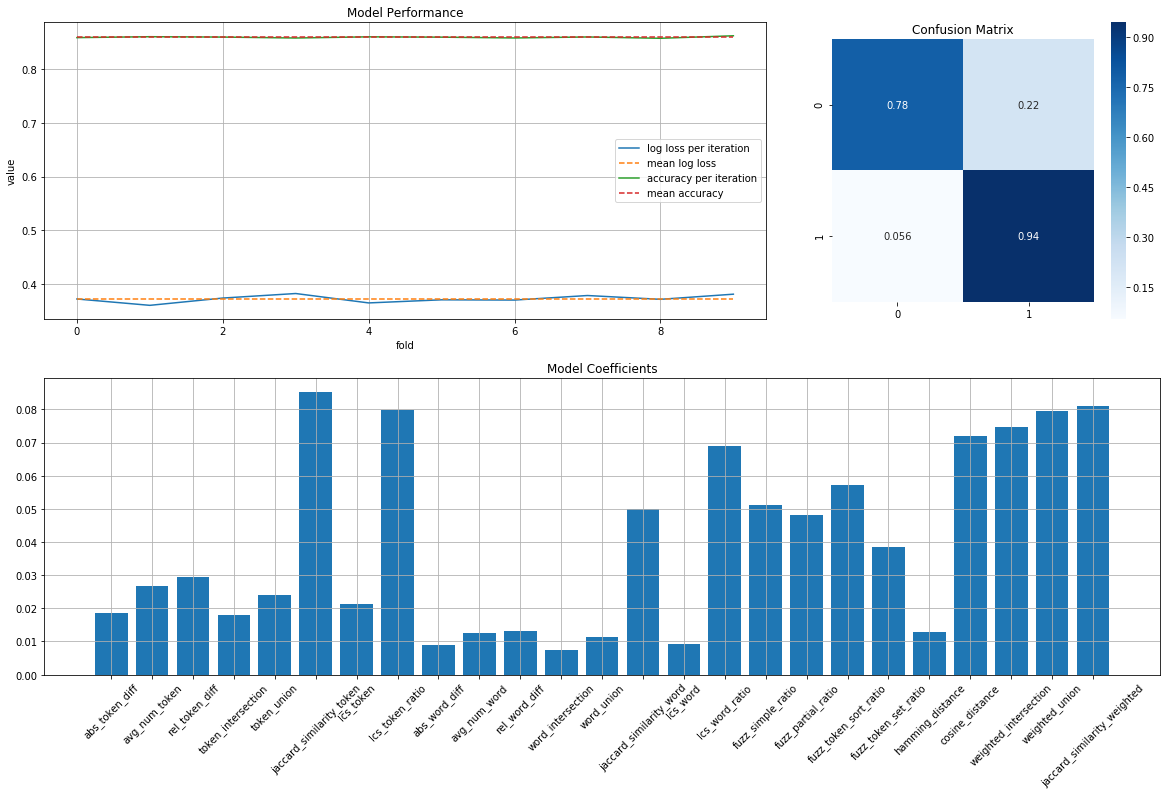

In [15]:
model = RandomForestClassifier(n_estimators=50, random_state=101)
rf50_performance, rf50_cm, rf50_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf50_performance['log loss']), '+-', np.std(rf50_performance['log loss']))

In [16]:
pickle.dump(rf50_model, open('ClassBalancedRF50.pkl', 'wb'))
del rf50_model

Mean Loss 0.35058098121646636 +- 0.005316858952157645


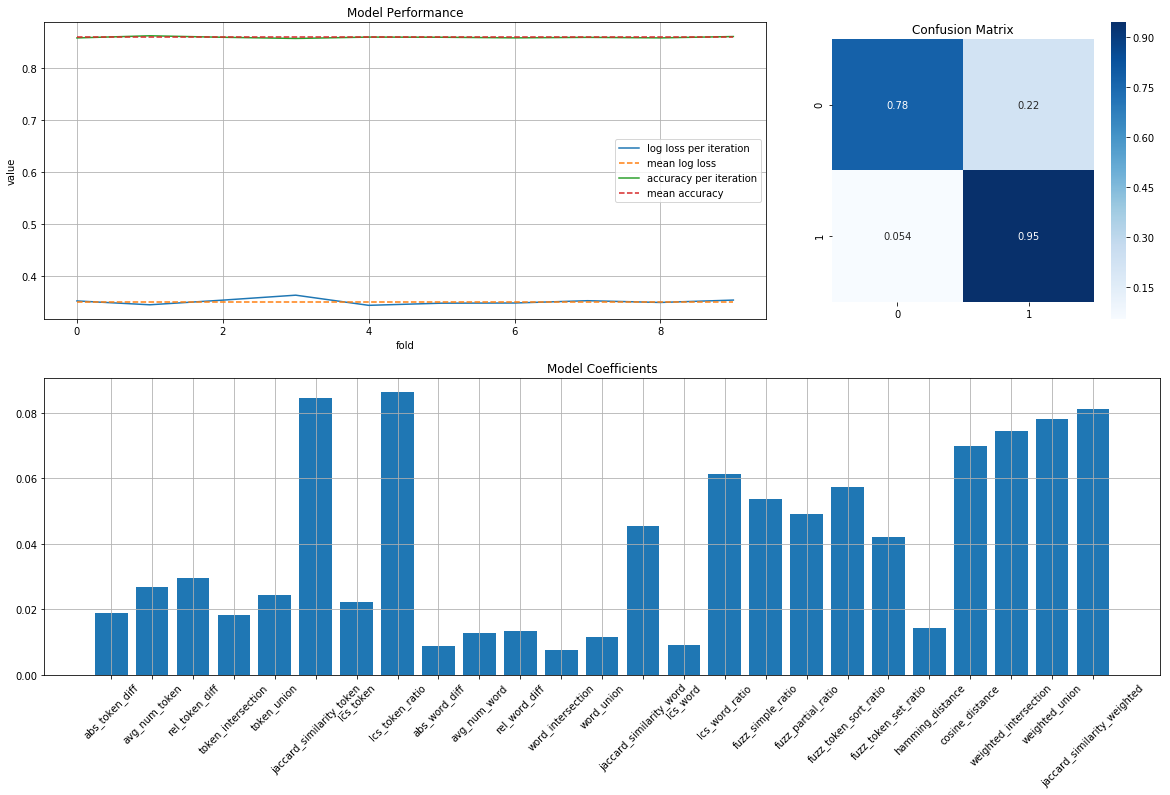

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=101)
rf100_performance, rf100_cm, rf100_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf100_performance['log loss']), '+-', np.std(rf100_performance['log loss']))

In [18]:
pickle.dump(rf100_model, open('ClassBalancedRF100.pkl', 'wb'))
del rf100_model

Mean Loss 0.342667848701638 +- 0.0043006357252984035


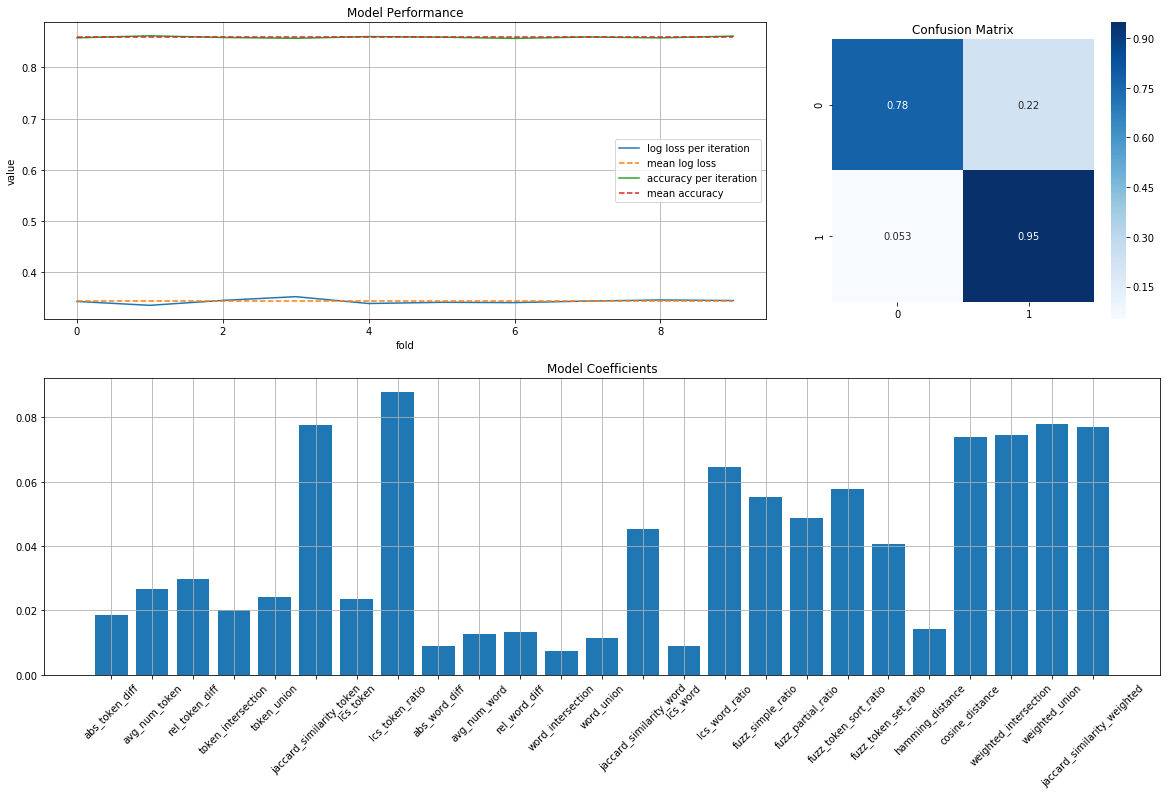

In [19]:
model = RandomForestClassifier(n_estimators=150, random_state=101)
rf150_performance, rf150_cm, rf150_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf150_performance['log loss']), '+-', np.std(rf150_performance['log loss']))

In [20]:
pickle.dump(rf150_model, open('ClassBalancedRF150.pkl', 'wb'))
del rf150_model

Mean Loss 0.33371534176149853 +- 0.004057887619393615


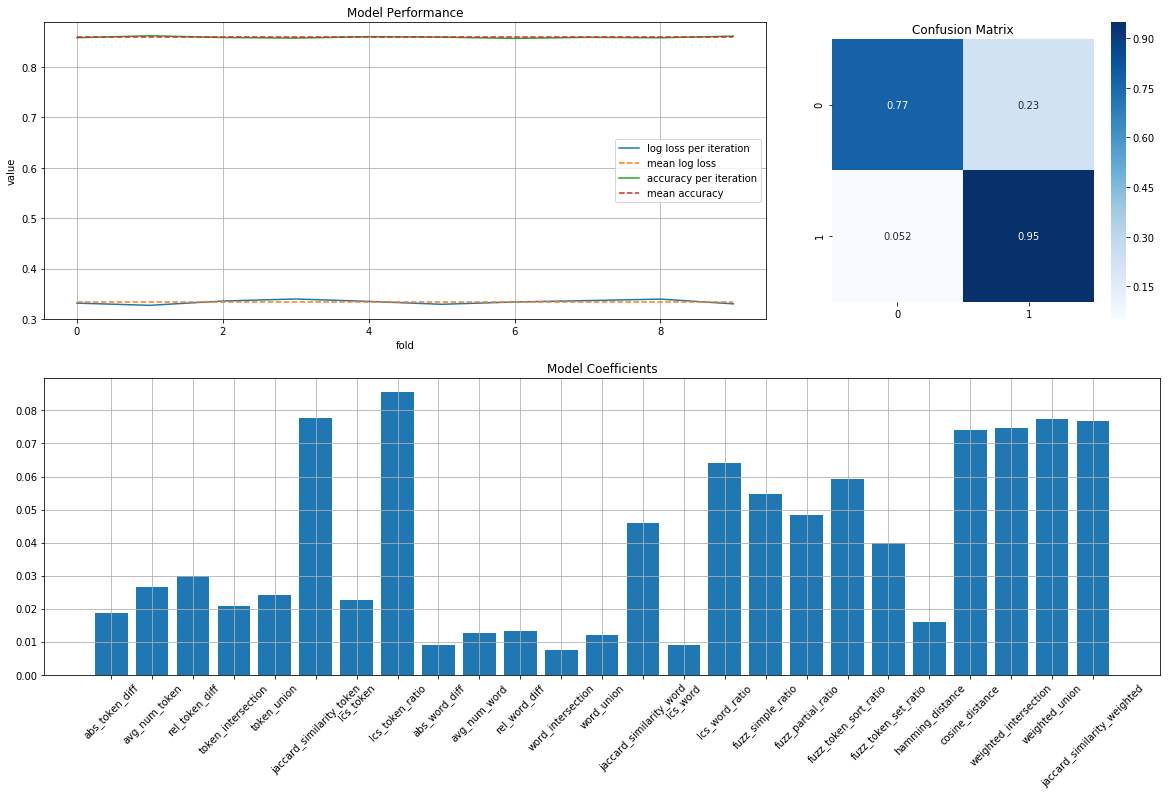

In [22]:
model = RandomForestClassifier(n_estimators=250, random_state=101)
rf250_performance, rf250_cm, rf250_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf250_performance['log loss']), '+-', np.std(rf250_performance['log loss']))

In [23]:
pickle.dump(rf250_model, open('ClassBalancedRF250.pkl', 'wb'))
del rf250_model

Mean Loss 0.3260085966748158 +- 0.003719560427176


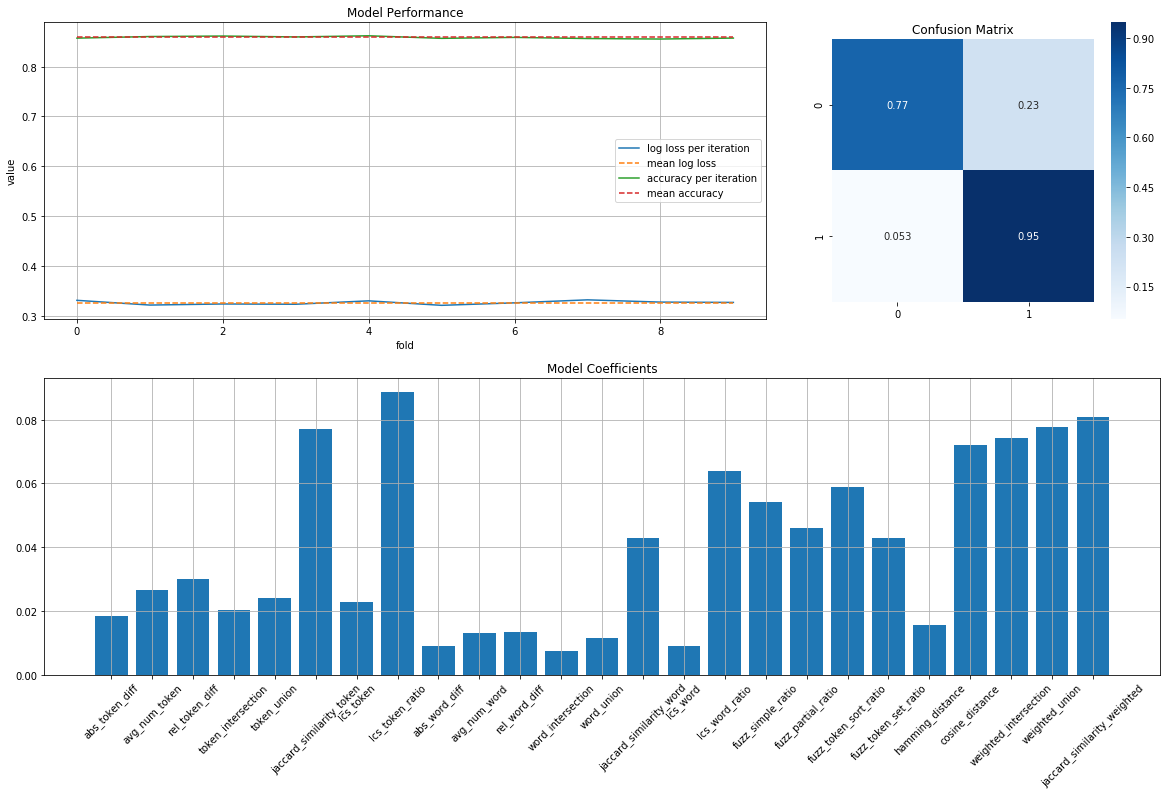

In [24]:
model = RandomForestClassifier(n_estimators=500, random_state=101)
rf500_performance, rf500_cm, rf500_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf500_performance['log loss']), '+-', np.std(rf500_performance['log loss']))

In [26]:
pickle.dump(rf500_model, open('ClassBalancedRF500.pkl', 'wb'))